# EDA do dataset do coletor automático de SAO PAULO - MIRANTE - SP (A701)

## Setup

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("Banco de dados/dados_A701_H_2010-10-10_2025-05-25.csv", skiprows=10, sep=";")

In [26]:
# Convert to datetime
df['Data'] = pd.to_datetime(
    df['Data Medicao'] + ' ' + df['Hora Medicao'].astype(str).str.zfill(4),
    format='%Y-%m-%d %H%M'
)
df = df.drop(['Data Medicao', 'Hora Medicao'], axis=1)

In [27]:
df = df.set_index('Data', drop=True)
df.head()

,"PRECIPITACAO TOTAL, HORARIO(mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)","PRESSAO ATMOSFERICA REDUZIDA NIVEL DO MAR, AUT(mB)",PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT)(mB),PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT)(mB),RADIACAO GLOBAL(Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)",TEMPERATURA DO PONTO DE ORVALHO(°C),TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C),TEMPERATURA MINIMA NA HORA ANT. (AUT)(°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT)(°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT)(°C),UMIDADE REL. MAX. NA HORA ANT. (AUT)(%),UMIDADE REL. MIN. NA HORA ANT. (AUT)(%),"UMIDADE RELATIVA DO AR, HORARIA(%)","VENTO, DIRECAO HORARIA (gr)(° (gr))","VENTO, RAJADA MAXIMA(m/s)","VENTO, VELOCIDADE HORARIA(m/s)"
Data,,,,,,,,,,,,,,,,,,
2010-10-10 00:00:00,0.0,932.4,1024.1,932.5,932.2,-2.5,13.6,11.5,14.0,13.6,11.5,11.1,87.0,83.0,87.0,170.0,7.2,3.2
2010-10-10 01:00:00,0.0,932.6,1024.2,932.6,932.3,-1.3,14.0,11.4,14.0,13.6,11.6,11.3,87.0,84.0,84.0,137.0,6.2,2.7
2010-10-10 02:00:00,0.0,932.4,1024.1,932.6,932.3,-1.5,13.8,10.9,14.0,13.8,11.4,10.8,85.0,82.0,82.0,134.0,8.4,2.9
2010-10-10 03:00:00,0.0,932.0,1023.7,932.4,931.9,-3.1,13.5,10.1,13.9,13.5,10.9,10.0,82.0,79.0,80.0,141.0,8.4,2.5
2010-10-10 04:00:00,0.0,931.7,1023.5,932.0,931.6,-3.3,13.3,10.1,13.7,13.3,10.4,10.1,81.0,80.0,81.0,128.0,6.2,2.1


In [28]:
df.shape

(128208, 18)

In [29]:
df.dropna().shape

(125592, 18)

In [30]:
df.columns

Index(['PRECIPITACAO TOTAL, HORARIO(mm)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)',
       'PRESSAO ATMOSFERICA REDUZIDA NIVEL DO MAR, AUT(mB)',
       'PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT)(mB)',
       'PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT)(mB)',
       'RADIACAO GLOBAL(Kj/m²)', 'TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)',
       'TEMPERATURA DO PONTO DE ORVALHO(°C)',
       'TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C)',
       'TEMPERATURA MINIMA NA HORA ANT. (AUT)(°C)',
       'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT)(°C)',
       'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT)(°C)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT)(%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT)(%)',
       'UMIDADE RELATIVA DO AR, HORARIA(%)',
       'VENTO, DIRECAO HORARIA (gr)(° (gr))', 'VENTO, RAJADA MAXIMA(m/s)',
       'VENTO, VELOCIDADE HORARIA(m/s)'],
      dtype='object')

In [31]:
# df_limpo = df.dropna()

In [32]:
df_limpo = df.interpolate(method='time', limit_direction='both')

In [33]:
matrix_correl = df_limpo.corr()

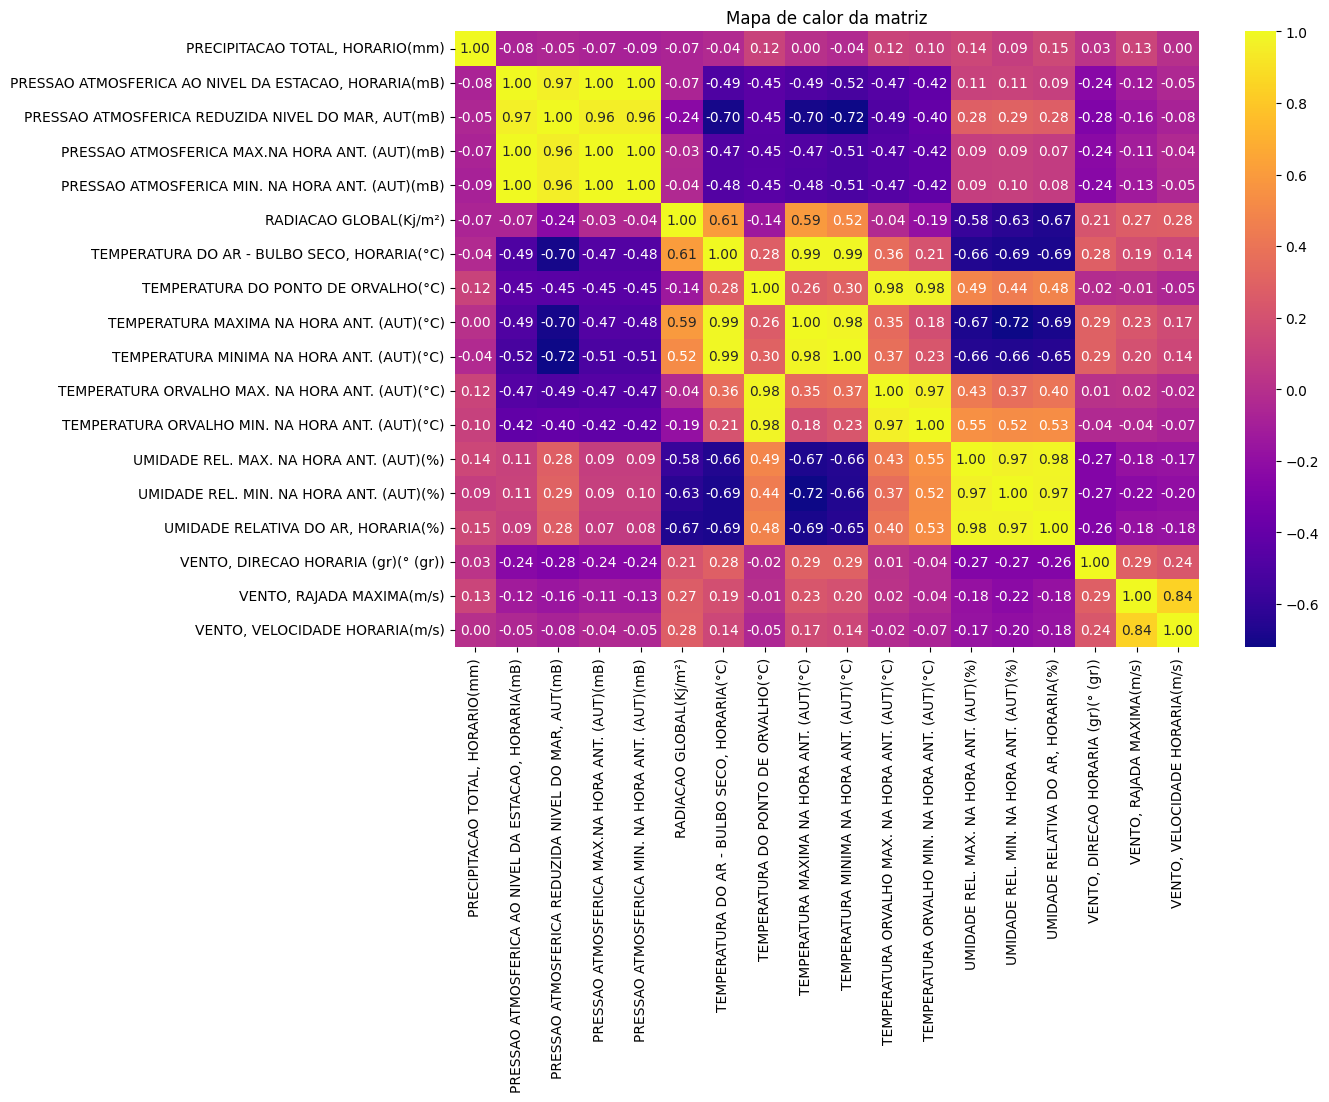

In [34]:
plt.figure(figsize=(12, 8))
sns.heatmap(matrix_correl, annot=True, cmap='plasma', fmt=".2f")
plt.title('Mapa de calor da matriz')
plt.show()

## Seleção dos mais relevantes

In [36]:
df_final = df_limpo
for linha in matrix_correl["PRECIPITACAO TOTAL, HORARIO(mm)"].index:
    if abs(matrix_correl["PRECIPITACAO TOTAL, HORARIO(mm)"].loc[linha]) < 0.1:
        df_final = df_final.drop(linha, axis=1)

In [37]:
df_final.head(2)

,"PRECIPITACAO TOTAL, HORARIO(mm)",TEMPERATURA DO PONTO DE ORVALHO(°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT)(°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT)(°C),UMIDADE REL. MAX. NA HORA ANT. (AUT)(%),"UMIDADE RELATIVA DO AR, HORARIA(%)","VENTO, RAJADA MAXIMA(m/s)"
Data,,,,,,,
2010-10-10 00:00:00,0.0,11.5,11.5,11.1,87.0,87.0,7.2
2010-10-10 01:00:00,0.0,11.4,11.6,11.3,87.0,84.0,6.2


In [39]:
df_final.to_csv("Banco de dados/inmet_filtrado_mirante.csv")